# 2D Aircraft Dynamics for Maneuvers

Let's look at a similar problem, but perhaps with some more exciting dynamics.

Suppose we have an [adrenaline-loving wingsuit pilot](https://en.wikipedia.org/wiki/Wingsuit_flying) who wants to race her friend to the bottom of a mountain.

Let's make some procedurally-generated mountain as follows:

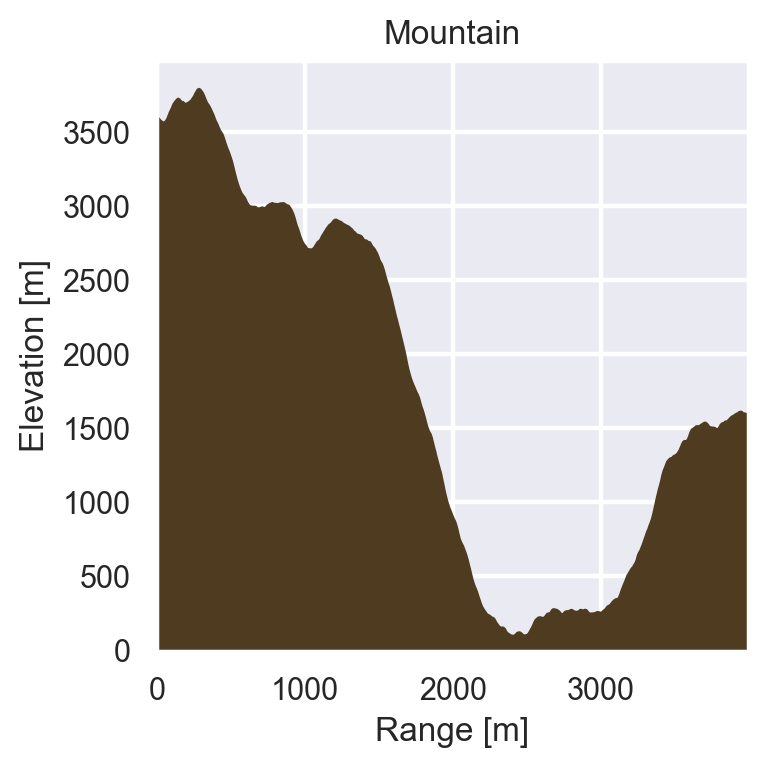

In [33]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt;
import aerosandbox.tools.pretty_plots as p

np.random.seed(5)


class Mountain:
    color = "#4f3b1f"

    def __init__(self,
                 x_max=4000,
                 resolution=8,  # Note - log-scaled
                 ):
        k = np.arange(2 ** resolution)
        d_omega = 2 * np.pi / len(k)
        omega = d_omega * np.arange(len(k))

        spatial_power = (omega + 1e-16) ** -3.5
        spatial_power[0] = 0  # Zero the DC-mode power

        spatial_amps = np.sqrt(2 * spatial_power * d_omega)
        spatial_phase = np.random.random(spatial_power.shape) * 2 * np.pi
        spatial_freq_signal = spatial_amps * np.exp(1j * spatial_phase)
        elevation = np.fft.irfft(
            spatial_freq_signal, axis=0
        )
        x = x_max * np.arange(len(elevation)) / len(elevation)

        elevation *= 2000
        elevation += - 0.5 * x
        elevation += 100 - elevation.min()

        self.x = x
        self.elevation = elevation

    def draw(self,
             show=True,
             set_bounds=True,
             set_equal=True,
             ):
        plt.fill_between(
            self.x,
            0,
            self.elevation,
            color=self.color
        )
        if set_equal:
            plt.gca().set_aspect("equal", adjustable='box')
        if set_bounds:
            plt.xlim(
                self.x.min(),
                self.x.max()
            )
            plt.ylim(bottom=0)
        if show:
            plt.show()


mountain = Mountain()
mountain.draw(show=False)
p.show_plot("Mountain", "Range [m]", "Elevation [m]")